In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt

In [25]:
env = gym.make('CartPole-v0')

# notes 
realision of q-learning algorightm.

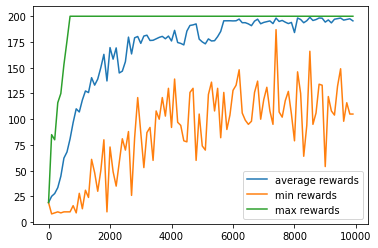

In [52]:
alpha = 0.1
gamma = 0.95
epochs = 10000 

epsilon = 0.95


def create_bins_and_q_table():

    numBins = 20
    obsSpaceSize = len(env.observation_space.high)

    bins = [
        np.linspace(-4.8, 4.8, numBins),
        np.linspace(-4, 4, numBins),
        np.linspace(-.418, .418, numBins),
        np.linspace(-4, 4, numBins)
    ]

    qTable = np.random.uniform(low=-2, high=0, size=([numBins] * obsSpaceSize + [env.action_space.n]))

    return bins, obsSpaceSize, qTable


def get_discrete_state(state, bins, obsSpaceSize):
    stateIndex = []
    for i in range(obsSpaceSize):
        stateIndex.append(np.digitize(state[i], bins[i]) - 1) 
    return tuple(stateIndex)


bins, obsSpaceSize, qTable = create_bins_and_q_table()

previousCnt = []  
metrics = {'ep': [], 'avg': [], 'min': [], 'max': []} 

for run in range(epochs):
    discreteState = get_discrete_state(env.reset(), bins, obsSpaceSize)
    done = False  
    cnt = 0  

    while not done:
        cnt += 1
        if np.random.random() > epsilon:
            action = np.argmax(qTable[discreteState])
        else:
            action = np.random.randint(0, env.action_space.n)
        newState, reward, done, _ = env.step(action)  

        newDiscreteState = get_discrete_state(newState, bins, obsSpaceSize)

        maxFutureQ = np.max(qTable[newDiscreteState])  
        currentQ = qTable[discreteState + (action, )]  

        if done and cnt < 200:
            reward = -375

        newQ = (1 - alpha) * currentQ + alpha * (reward + gamma * maxFutureQ)
        qTable[discreteState + (action, )] = newQ  

        discreteState = newDiscreteState

    previousCnt.append(cnt)

                
    if run % 100 == 0:
        latestRuns = previousCnt[-100:]
        averageCnt = sum(latestRuns) / len(latestRuns)
        metrics['ep'].append(run)
        metrics['avg'].append(averageCnt)
        metrics['min'].append(min(latestRuns))
        metrics['max'].append(max(latestRuns))
        epsilon*=0.9
        #print(epsilon)

env.close()
plt.plot(metrics['ep'], metrics['avg'], label="average rewards")
plt.plot(metrics['ep'], metrics['min'], label="min rewards")
plt.plot(metrics['ep'], metrics['max'], label="max rewards")
plt.legend(loc=4)
plt.show()